In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.layers import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator

es = EarlyStopping(monitor = "val_loss", mode = "min", patience = 5)

EPOCHS = 100

In [2]:
root_path = "data_images/"

gen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=20,
    validation_split=0.2
)

# Load Data
train_dataset = gen.flow_from_directory(
    root_path,
    class_mode="categorical",
    classes=["smile","non_smile"],
    shuffle=True,
    batch_size=32,
    target_size=(64,64),
    subset="training"
)

validation_dataset = gen.flow_from_directory(
    root_path,
    class_mode="categorical",
    classes=["smile","non_smile"],
    shuffle=True,
    batch_size=32,
    target_size=(64,64),
    subset="validation"
)

Found 963 images belonging to 2 classes.
Found 240 images belonging to 2 classes.


In [3]:
from tensorflow.keras.models import load_model
reloaded_model = load_model("best_model.h5")

In [4]:
reloaded_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 16)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 15376)             0         
                                                                 
 dense (Dense)               (None, 512)               7873024   
                                                                 
 dense_1 (Dense)             (None, 2)                 1026      
                                                                 
Total params: 7,874,498
Trainable params: 7,874,498
Non-trainable params: 0
______________________________________________

In [5]:
output = reloaded_model.predict(validation_dataset)

8/8 [==============================] - 0s 38ms/step


In [11]:
#na podstawie pliku 8.3 wyświetl wyniki predykcji. Spóbuj poradzić sobie z błędami.

In [12]:
img, label = validation_dataset.next()
y_pred = reloaded_model.predict(img)

1/1 [==============================] - 0s 78ms/step


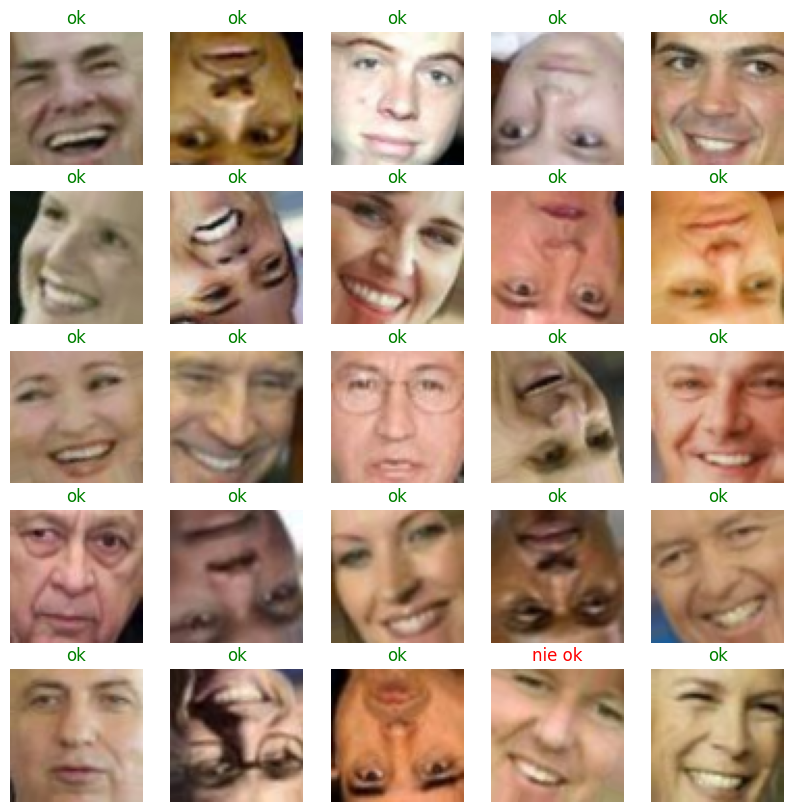

In [16]:
plt.figure(figsize=(10,10))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(img[i])
    plt.axis('off')
    if np.round(y_pred[i])[0] == label[i][0]:
        plt.title("ok", color = 'green')
    else:
        plt.title("nie ok", color = 'red')    